In [181]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

#for my random attempt
from random import randint

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

In [182]:
mnist = pd.read_csv('datasets/digit_recognizer/train.csv')
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [183]:
print(mnist.head(4))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0      

pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
Name: 1, dtype: int64


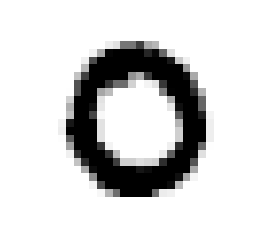

Index([u'label', u'pixel0', u'pixel1', u'pixel2', u'pixel3', u'pixel4',
       u'pixel5', u'pixel6', u'pixel7', u'pixel8',
       ...
       u'pixel774', u'pixel775', u'pixel776', u'pixel777', u'pixel778',
       u'pixel779', u'pixel780', u'pixel781', u'pixel782', u'pixel783'],
      dtype='object', length=785)


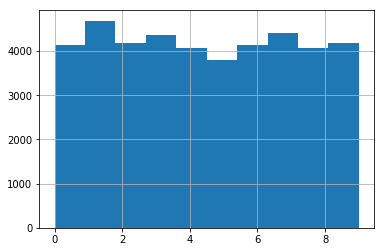

In [184]:
# print one number
myNumber = mnist.iloc[1,1:]
print (myNumber[:5])
myNumber=myNumber.values.reshape((28,28))
plt.imshow(myNumber, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
mnist['label'].hist()
print(mnist.columns)

In [185]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(mnist.iloc[:,1:], mnist.iloc[:,0], test_size=0.2, random_state=42)

print( "\nTraining Percentages:\n" )
print(train_X.shape[0]/len(mnist.iloc[:,1:]))
print(train_Y.shape[0]/len(mnist.iloc[:,1:]))
print( train_X.shape )


Training Percentages:

0.8
0.8
(33600, 784)


In [186]:

# No shaping
myNumber = train_X.iloc[5]
myNumberLabel = train_Y.iloc[5]
myNumber2 = train_X.iloc[7]
myNumberLabel2 = train_Y.iloc[7]
print (myNumber)
print (myNumberLabel)

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 28009, Length: 784, dtype: int64
8


In [187]:
## Shape it into the 28x28 image.
myNumber = myNumber.values.reshape((28,28))
myNumber2 = myNumber2.values.reshape((28,28))
print(myNumber.shape)
for x in myNumber: print (' '.join('%s'%n for n in x))

(28L, 28L)
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 86 170 170 198 170 170 114 57 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 114 255 255 255 255 255 255 255 255 226 29 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 86 255 255 57 29 0 114 198 255 255 255 255 86 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 226 255 114 0 0 0 0 0 29 86 198 255 255 0 0 0 0 0 0 0
0 0 0 0 0 0 0 86 255 114 0 0 0 0 0 0 0 0 57 255 255 0 0 0 0 0 0 0
0 0 0 0 0 0 0 141 255 57 0 0 0 0 0 0 0 0 0 198 255 57 0 0 0 0 0 0
0 0 0 0 0 0 0 255 255 0 0 0 0 0 0 0 0 0 0 170 255 29 0 0 0 0 0 0
0 0 0 0 0 0 0 198 255 86 0 0 0 86 170 226 170 57 114 255 198 0 0 0 0 0 0 0
0 0 0 0 0 0 0 57 255 255 198 114 198 255 255 255 255 255 255 255 57 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 170 255 255 255 255 255 255 255 255 255 255 22

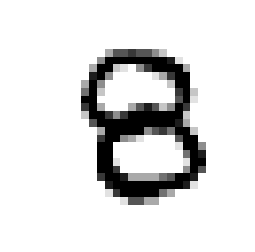

8


In [188]:
plt.imshow(myNumber, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
print (myNumberLabel)

In [189]:
from sklearn.tree import DecisionTreeClassifier
"""
With a deaper depth in the decision tree the prediction becomes
a lot higher as we can see from the percentage difference in the max_depth
of 2 and the max depth at 9.
"""
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(train_X,train_Y)
y_pred = classifier.predict(train_X)
print ("Accuracy on Training: ",sum(y_pred==train_Y)/len(train_Y))

y_pred = classifier.predict(test_X)
print ("Accuracy on Test: ",sum(y_pred==test_Y)/len(test_Y))
myNumber = myNumber.reshape(1,-1)
print ('Prediction on myNumber: %i'%classifier.predict(myNumber))

Accuracy on Training:  0.33681547619
Accuracy on Test:  0.342738095238
Prediction on myNumber: 3


In [190]:
classifier = DecisionTreeClassifier(max_depth=9)
classifier.fit(train_X,train_Y)
y_pred = classifier.predict(train_X)
print ("Accuracy on Training: ",sum(y_pred==train_Y)/len(train_Y))

y_pred = classifier.predict(test_X)
print ("Accuracy on Test: ",sum(y_pred==test_Y)/len(test_Y))
myNumber = myNumber.reshape(1,-1)
print ('Prediction on myNumber: %i'%classifier.predict(myNumber))

Accuracy on Training:  0.873928571429
Accuracy on Test:  0.834761904762
Prediction on myNumber: 8


In [191]:
mnist_test = pd.read_csv('datasets/digit_recognizer/test.csv')
mnist_test.info()

#mnist_test['label']= mnist_test.label.apply(lambda x: randint(0, 9)) #this was another attempt at changing that did not work
mnist_test['label'] = randint(0,9)
"""
I wasn't to sure how to really use the desicion tree predictions
to have them give the label it's numbered guess so I rather than 
just guessing all numbers to be 0 and setting lable to that I wanted
to see how well just a completly random prediction would work by
setting up label to be a number from 0-9. Unfortunatlly the label
would not set to the random number and would stay 0
"""
print("Example of random number: ",randint(0,9))

mnist_test.index+=1
mnist_test.index.name='ImageId'
mnist_test.columns=mnist.columns
mnist_test['label'].to_csv('datasets/digit_recognizer/miklo_submission.csv', index=True, header=True)
#I also print the head to 20 to see if the label actually changed to random numbers
print(mnist_test[['label']].head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
Example of random number:  0
         label
ImageId       
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
